**Understanding the variables in the dataset:**

age (in years): This variable represents the age of an individual in years. It indicates the age at the time of data collection.

sex: This variable represents the gender of an individual. It is encoded as 1 for male and 0 for female.

cp: This variable represents the type of chest pain experienced by an individual. It has four discrete values that indicate different types of chest pain. (0-typical angina, 1-atypical angina, 2-non-anginal pain, 3-asymptomatic)

trestbps: This variable represents the resting blood pressure of an individual in mm Hg (millimeters of mercury) measured at the time of admission to the hospital. It provides information about the baseline blood pressure.

chol: This variable represents the serum cholesterol level of an individual in mg/dl (milligrams per deciliter). It indicates the level of cholesterol in the bloodstream.

fbs: This variable indicates whether an individual's fasting blood sugar level is greater than 120 mg/dl. It is encoded as 1 for true (fasting blood sugar > 120 mg/dl) and 0 for false (fasting blood sugar <= 120 mg/dl).

restecg: This variable represents the results of the resting electrocardiogram (ECG) of an individual. It provides information about the electrical activity of the heart during rest.

thalach: This variable represents the maximum heart rate achieved by an individual during exercise. It indicates the highest heart rate observed during physical activity.

exang: This variable indicates whether an individual experiences exercise-induced angina. It is encoded as 1 for yes (angina is induced by exercise) and 0 for no (angina is not induced by exercise).

oldpeak: This variable represents the ST depression induced by exercise relative to rest. It provides information about changes in the electrocardiogram (ECG) results as a result of exercise.

slope: This variable represents the slope of the peak exercise ST segment. It provides information about the shape of the ECG waveform during exercise.

ca: This variable represents the number of major blood vessels (0-3) colored by fluoroscopy. It indicates the presence and severity of blood vessel abnormalities.

thal: This variable represents the results of a cardiac stress test. It has three discrete values indicating different types of defects in the heart. 0,1 = normal; 2 = fixed defect; 3 = reversable defect

target: This variable indicates the presence or absence of heart disease. It is encoded as 0 for the absence of heart disease and 1 for the presence of heart disease.

In [1]:
#importimg required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, RocCurveDisplay, confusion_matrix

sns.set_style('whitegrid')
colors = ["#00b33c","#ff471a"] 

In [2]:
#loading dataset
def load_csv_data(path):
    '''
    Load the CSV file while displaying all the columns and returns the DataFrame
    '''
    df = pd.read_csv(path)
    pd.set_option('display.max_columns', None)
    return df

In [3]:
df = load_csv_data('heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
#for better readability of column names change the colum names
df.columns = ['age', 'sex', 'chest_pain', 'resting_bp', 'cholesterol', 
              'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate','exercise_induced_angina',
              'st_depression', 'st_slope', 'num_major_vessels','cardiac_stress', 'heart_disease']

In [6]:
#get the information about the loaded dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1025 non-null   int64  
 1   sex                      1025 non-null   int64  
 2   chest_pain               1025 non-null   int64  
 3   resting_bp               1025 non-null   int64  
 4   cholesterol              1025 non-null   int64  
 5   fasting_blood_sugar      1025 non-null   int64  
 6   rest_ecg                 1025 non-null   int64  
 7   max_heart_rate           1025 non-null   int64  
 8   exercise_induced_angina  1025 non-null   int64  
 9   st_depression            1025 non-null   float64
 10  st_slope                 1025 non-null   int64  
 11  num_major_vessels        1025 non-null   int64  
 12  cardiac_stress           1025 non-null   int64  
 13  heart_disease            1025 non-null   int64  
dtypes: float64(1), int64(13)

- From the above information we have got, we can conclude there are no null values and a varible called 'oldpeak' is of data type 'float64' and rest all are 'int64'
- We can also confirm that there are no wrong data type variables in the dataset

In [7]:
#describe continuous variable of the data
cont_var = ['age', 'resting_bp', 'cholesterol', 'max_heart_rate', 'st_depression']
df[cont_var].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
resting_bp,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
cholesterol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
max_heart_rate,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
st_depression,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [8]:
#list the discrete variables
disc_var = [var for var in df.columns if var not in cont_var]
for var in disc_var:
    print('{} has {} unique value, mode is {}'.format(var,df[var].nunique(), df[var].mode().values[0]))

sex has 2 unique value, mode is 1
chest_pain has 4 unique value, mode is 0
fasting_blood_sugar has 2 unique value, mode is 0
rest_ecg has 3 unique value, mode is 1
exercise_induced_angina has 2 unique value, mode is 0
st_slope has 3 unique value, mode is 1
num_major_vessels has 5 unique value, mode is 0
cardiac_stress has 4 unique value, mode is 2
heart_disease has 2 unique value, mode is 1


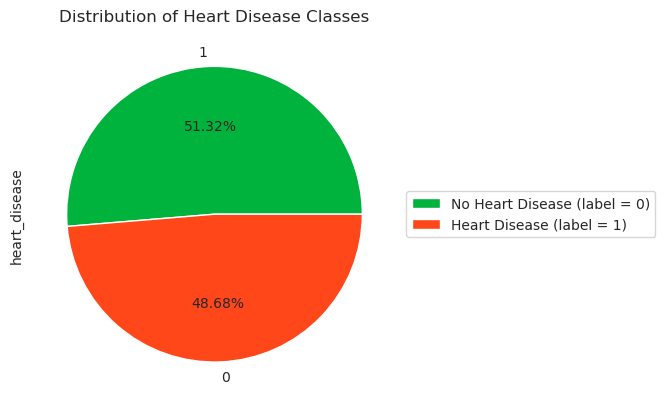

In [9]:
#check classes in the dependent variable
df['heart_disease'].value_counts().plot(kind='pie', autopct='%.2f%%', colors=colors)
plt.title('Distribution of Heart Disease Classes')
labels = ['No Heart Disease (label = 0)', 'Heart Disease (label = 1)']
plt.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

- From the distribution, we can observe that the data is balanced i.e, no any bias towards any class

In [10]:
def CorrelationMatrix(data):
    plt.figure(figsize=(10,6))
    sns.heatmap(data.corr(), annot=True)
    plt.show()
    
def PairPlot(data, features=None, hue=None, corner=False):
    sns.pairplot(data[features], hue=hue, corner=True, palette=colors)
    plt.show()

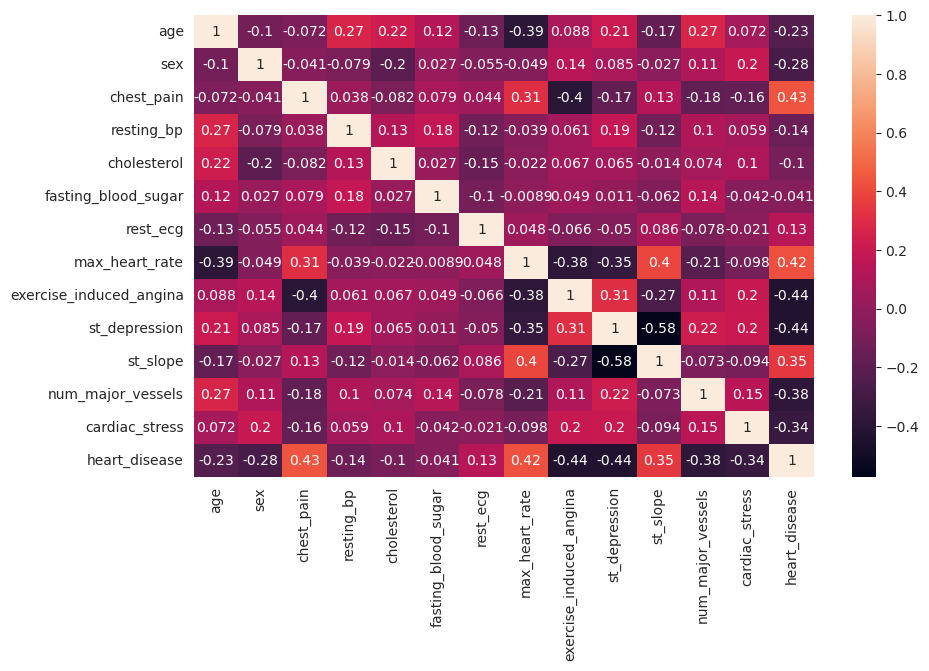

In [11]:
CorrelationMatrix(df)

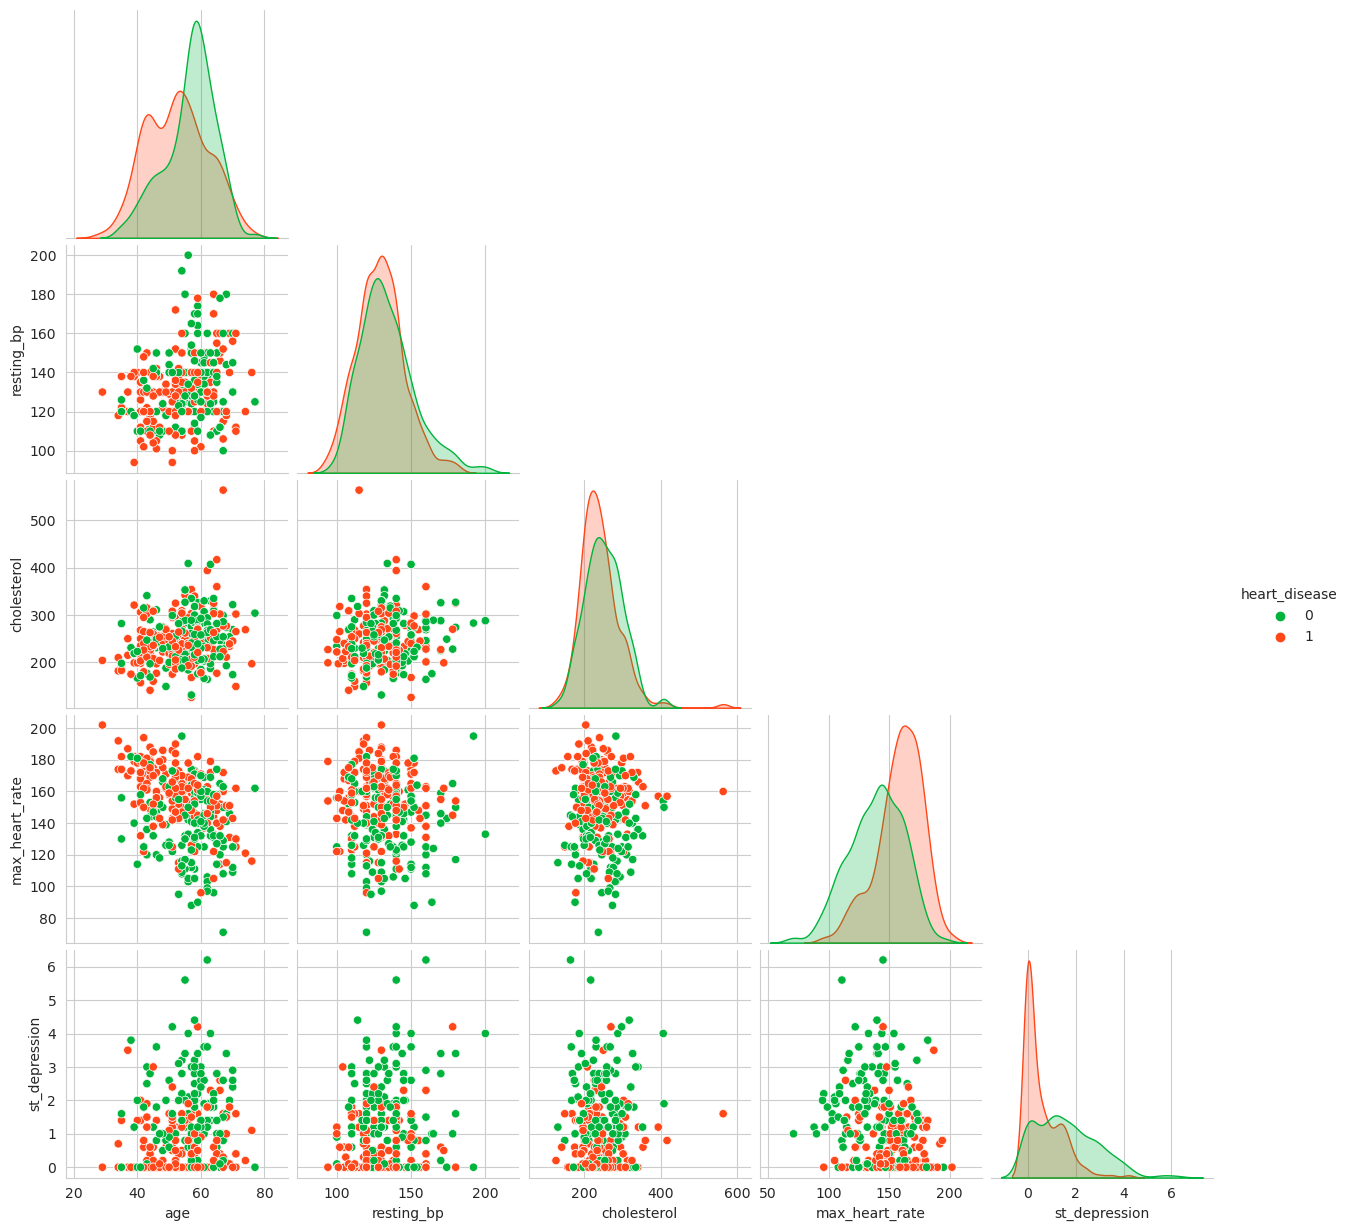

In [12]:
PairPlot(df, cont_var+['heart_disease'], 'heart_disease', True)

- We can observe that, there are some features that have huge importance in whether a person is having a heart problem or not

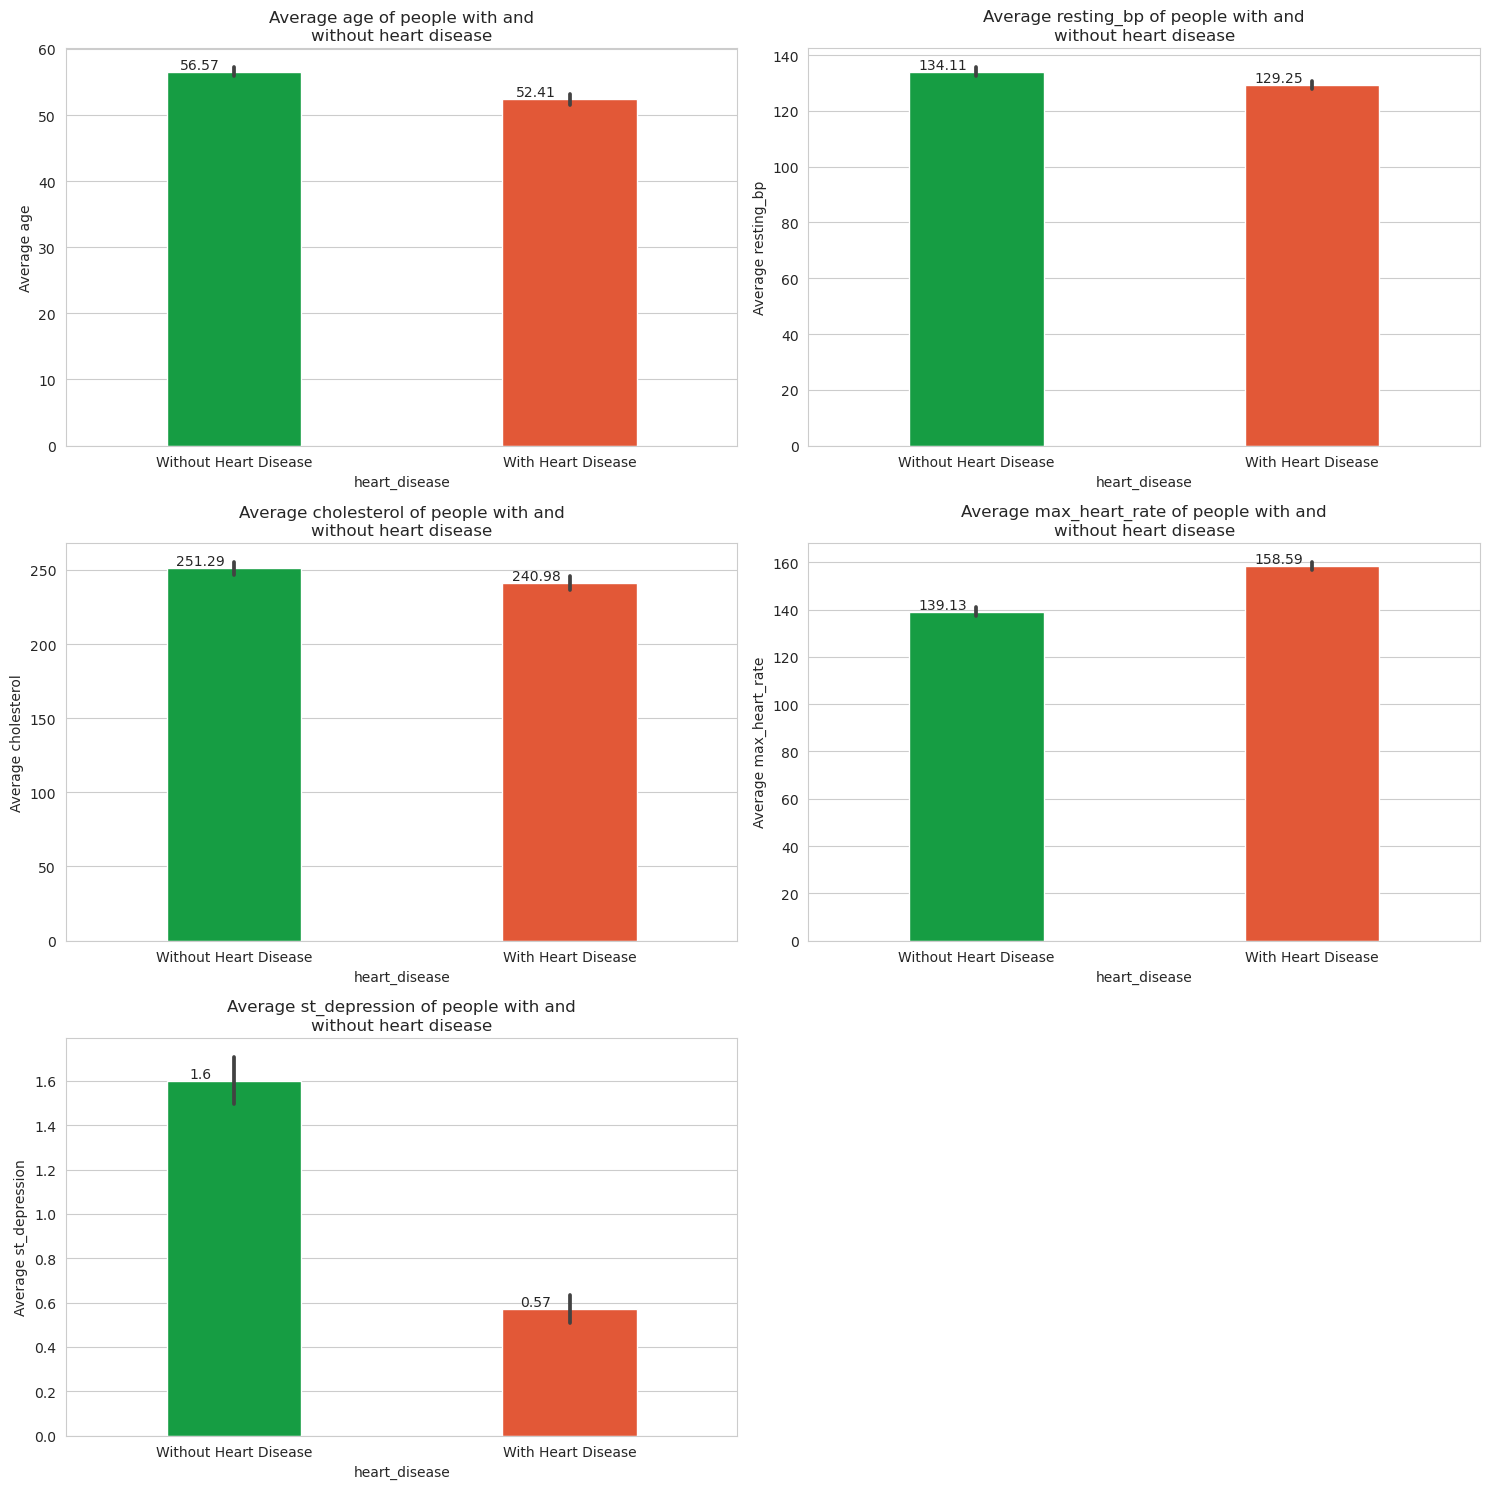

In [13]:
def plot_average_bar_plots(data, variables, target):
    plt.figure(figsize=(15, 15))
    for i, var in enumerate(variables, 1):
        rows = (len(variables) + 1) // 2
        plt.subplot(rows, 2, i)
        ax = sns.barplot(data=data, x=target, y=var, palette=colors, width=0.4)
        ax.set_xticklabels(['Without Heart Disease', 'With Heart Disease'], rotation=0)
        ax.set_ylabel('Average {}'.format(var))
        for j, v in enumerate(ax.patches):
            x = v.get_x() + v.get_width() / 4
            y = v.get_height()
            ax.text(x, y, round(y, 2), ha='center', va='bottom')
        plt.title('Average {} of people with and\nwithout heart disease'.format(var))
    plt.tight_layout()
    plt.show()
    
plot_average_bar_plots(df, cont_var, 'heart_disease')

In [14]:
sex_target = pd.crosstab(df['sex'], df['heart_disease'], margins=True)
display(sex_target.style.background_gradient(cmap='YlOrRd_r'))

male_target1 = sex_target[1][0]/sex_target['All'][0]
female_target1 = sex_target[1][1]/sex_target['All'][1]

print('--- {}% of heart disease are Females'.format(round(male_target1*100, 2)))
print('--- {}% of heart disease are Males'.format(round(female_target1*100, 2)))

heart_disease,0,1,All
sex,,,
0,86,226,312
1,413,300,713
All,499,526,1025


--- 72.44% of heart disease are Females
--- 42.08% of heart disease are Males


In [15]:
df['age'].agg(['min', 'max'])

min    29
max    77
Name: age, dtype: int64

- The above plot indicates that the more the pain in the chest the greater the chances of having a heart disease

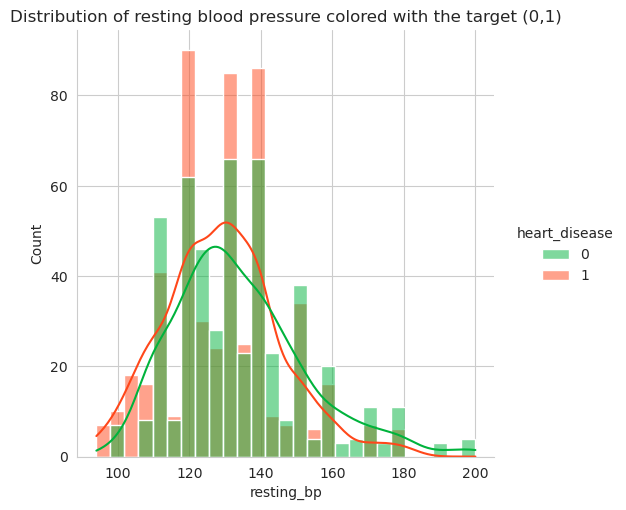

In [16]:
sns.displot(df, x='resting_bp', hue='heart_disease', kde=True, palette=colors)
plt.title('Distribution of resting blood pressure colored with the target (0,1)')
plt.show()

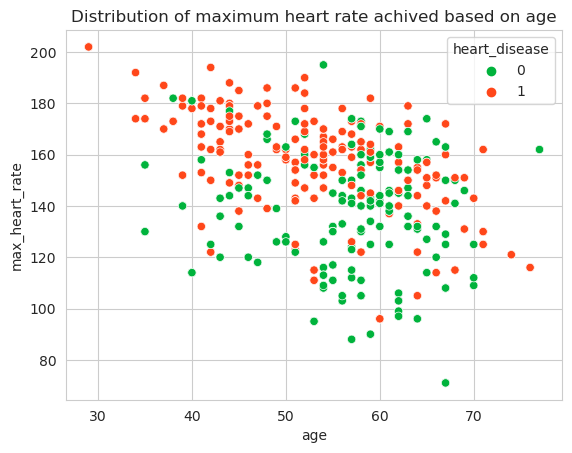

In [17]:
sns.scatterplot(df, x='age', y='max_heart_rate', hue='heart_disease', palette=colors)
plt.title('Distribution of maximum heart rate achived based on age')
plt.show()

- As the age increases the maximum heartbeat reduces, and the more the heart rate the higher is the chance for having heart disease

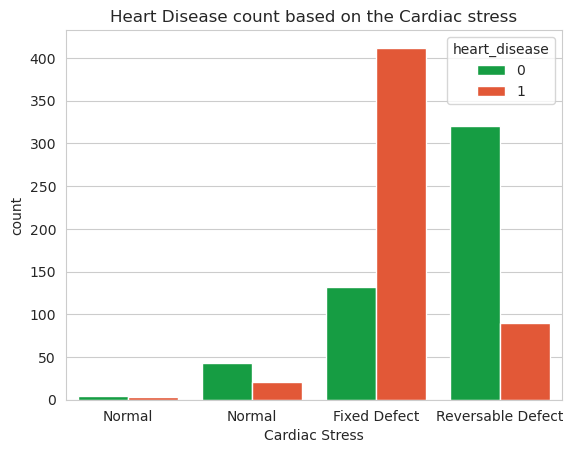

In [18]:
sns.countplot(df, x='cardiac_stress', hue='heart_disease', palette=colors)
plt.xlabel('Cardiac Stress')
plt.xticks(ticks=[0,1,2,3], labels=['Normal', 'Normal', 'Fixed Defect', 'Reversable Defect'])
plt.title('Heart Disease count based on the Cardiac stress')
plt.show()

- If the result of cardiac stress is 2 (fixed defect) then the chances of having a heart disease is very high compared to the other results

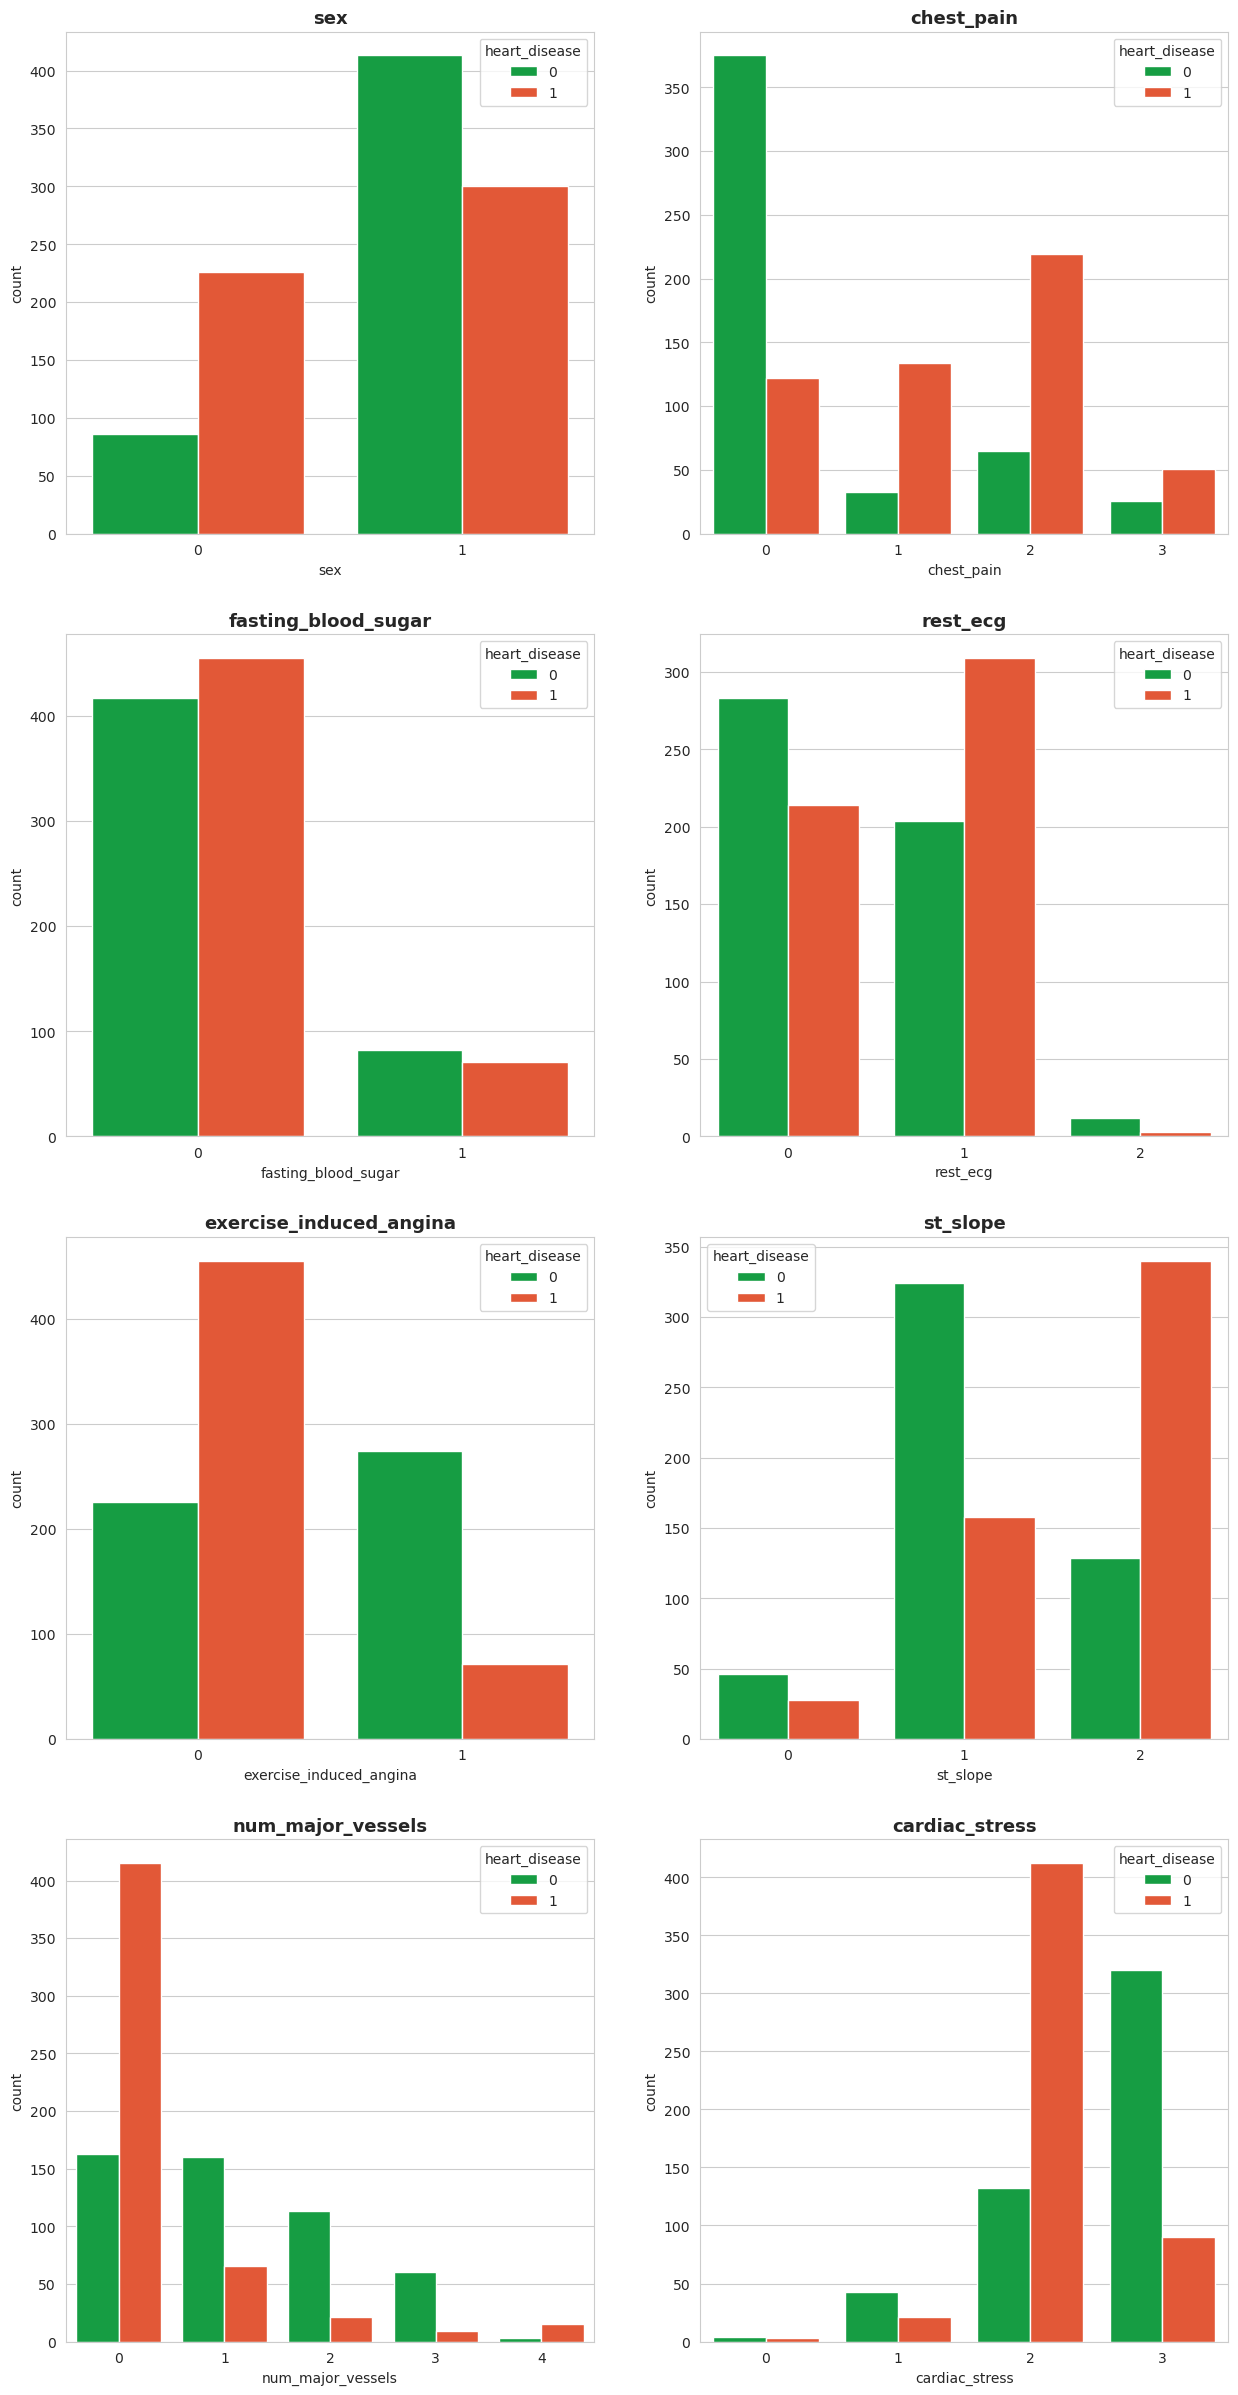

In [19]:
def CountPlot(data, features, target=None, colors=None, cols=2):
    plt.figure(figsize=(15, 30))
    for i, col in enumerate(features, 1):
        rows = (len(features) + 1) // 2
        plt.subplot(rows, cols, i)
        sns.countplot(data=data, x=col, hue=target, palette=colors)
        plt.title(col, fontdict={'fontweight': 'bold', 'fontsize': 13})
    plt.show()

CountPlot(df, [var for var in disc_var if var != 'heart_disease'], target='heart_disease',
          colors=["#00b33c","#ff471a"] )

**Insights:**

- sex: The sex column has 2 values, 0 for female and 1 for male. From the plot we can see that females are having more heart diseases than males (proportion - considering the population)
- chest_pain: There are 4 types of chest pains in the data,  0-typical angina, 1-atypical angina, 2-non-anginal pain, 3-asymptomatic. If there is chest pain then there are higher chances of having heart diseases
- fasting_blood_sugar: If the fasting blood sugar is lower than 120mg/dl (indicated with 0) has higher chances of heart disease than thos who have the level >120mg/dl (indicated with 1)
- rest_ecg: If the rest ECG is ST-T wave abnormality indicated with 1, has higher chances of having the heart disease, than the other
- exercise_induced_angina: Angina is having chest pain when heart muscles didn't receive enought blood or oxygen. This feature has 2 classes with 0 - no angina (pain) while exercising, 1 - angnina, from the plot we can see that people who have pain in the chest while exercising has more chances of having heart disease, as this is abnormal
- st_slpoe: This feature has 3 classes, up slope, no slope, down slope, so people who are having down slope have hager risk of having heart disease
- num_major_vessels: If blood flow is not visible in any of the vessels then there are higher chances of having the risk of heart diseases
- cardiac_stress: If the cardiac stress is fixed defect then there are higher chances of heart disease

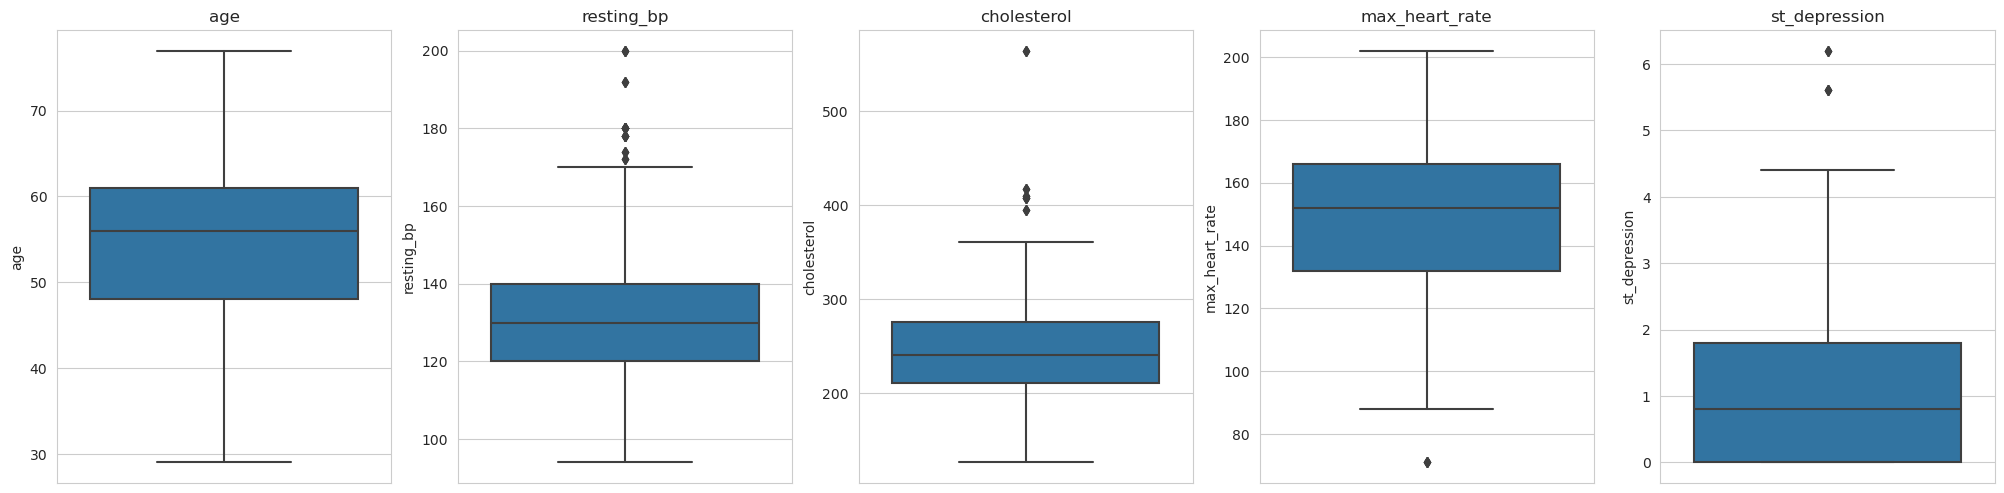

In [20]:
def box_plot(data, features, cols=5):
    plt.figure(figsize=(25,20))
    for i,col in enumerate(features,1):
        rows = (len(features)+1)//2
        plt.subplot(rows, cols,i)
        sns.boxplot(df, y=col)
        plt.title(col)
        
    plt.show()
    
box_plot(data = df, features = cont_var)

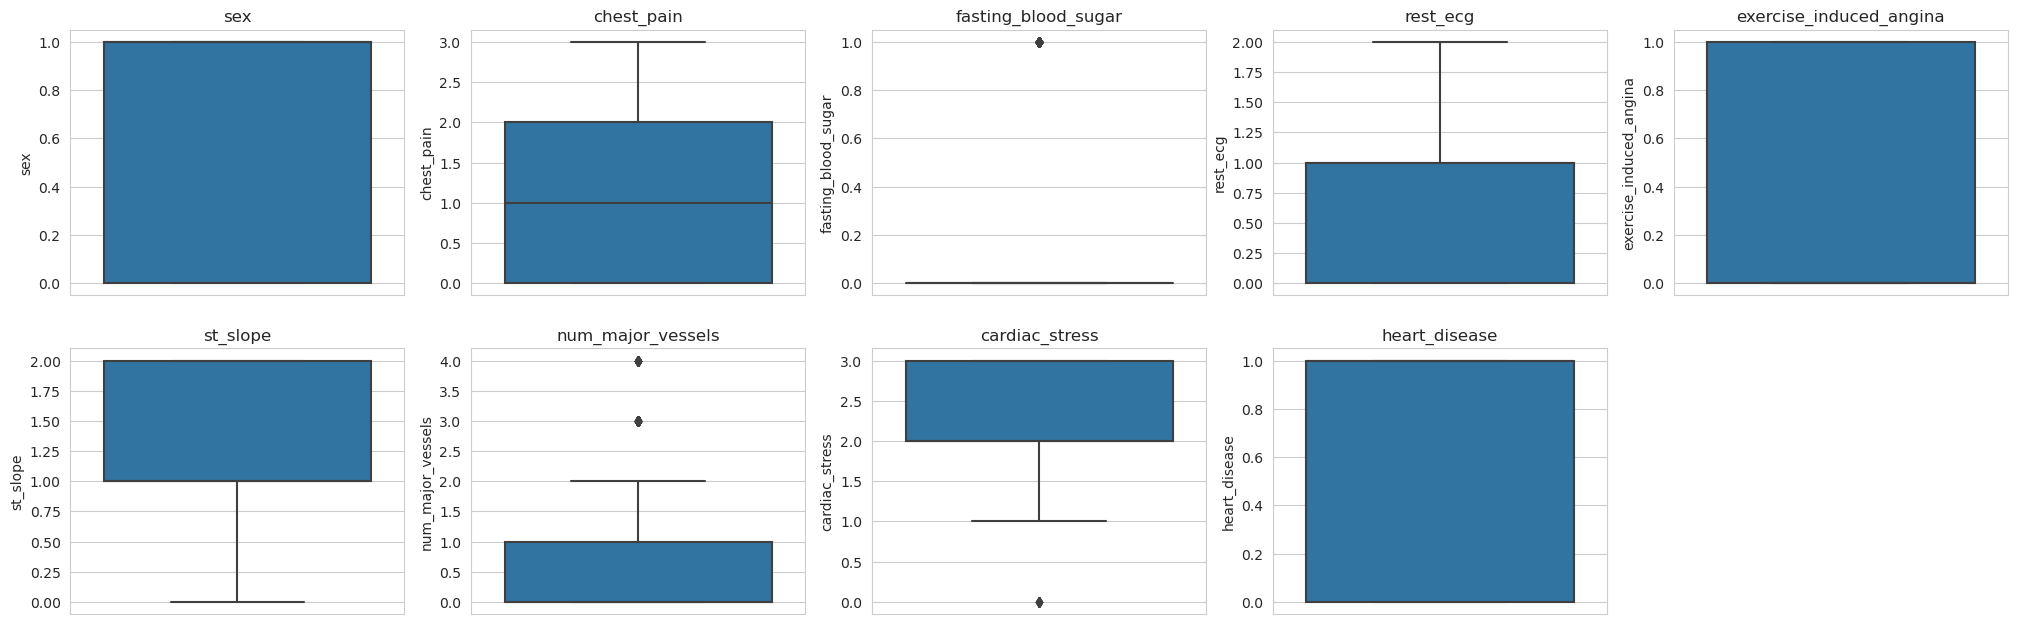

In [21]:
box_plot(data = df, features = disc_var)

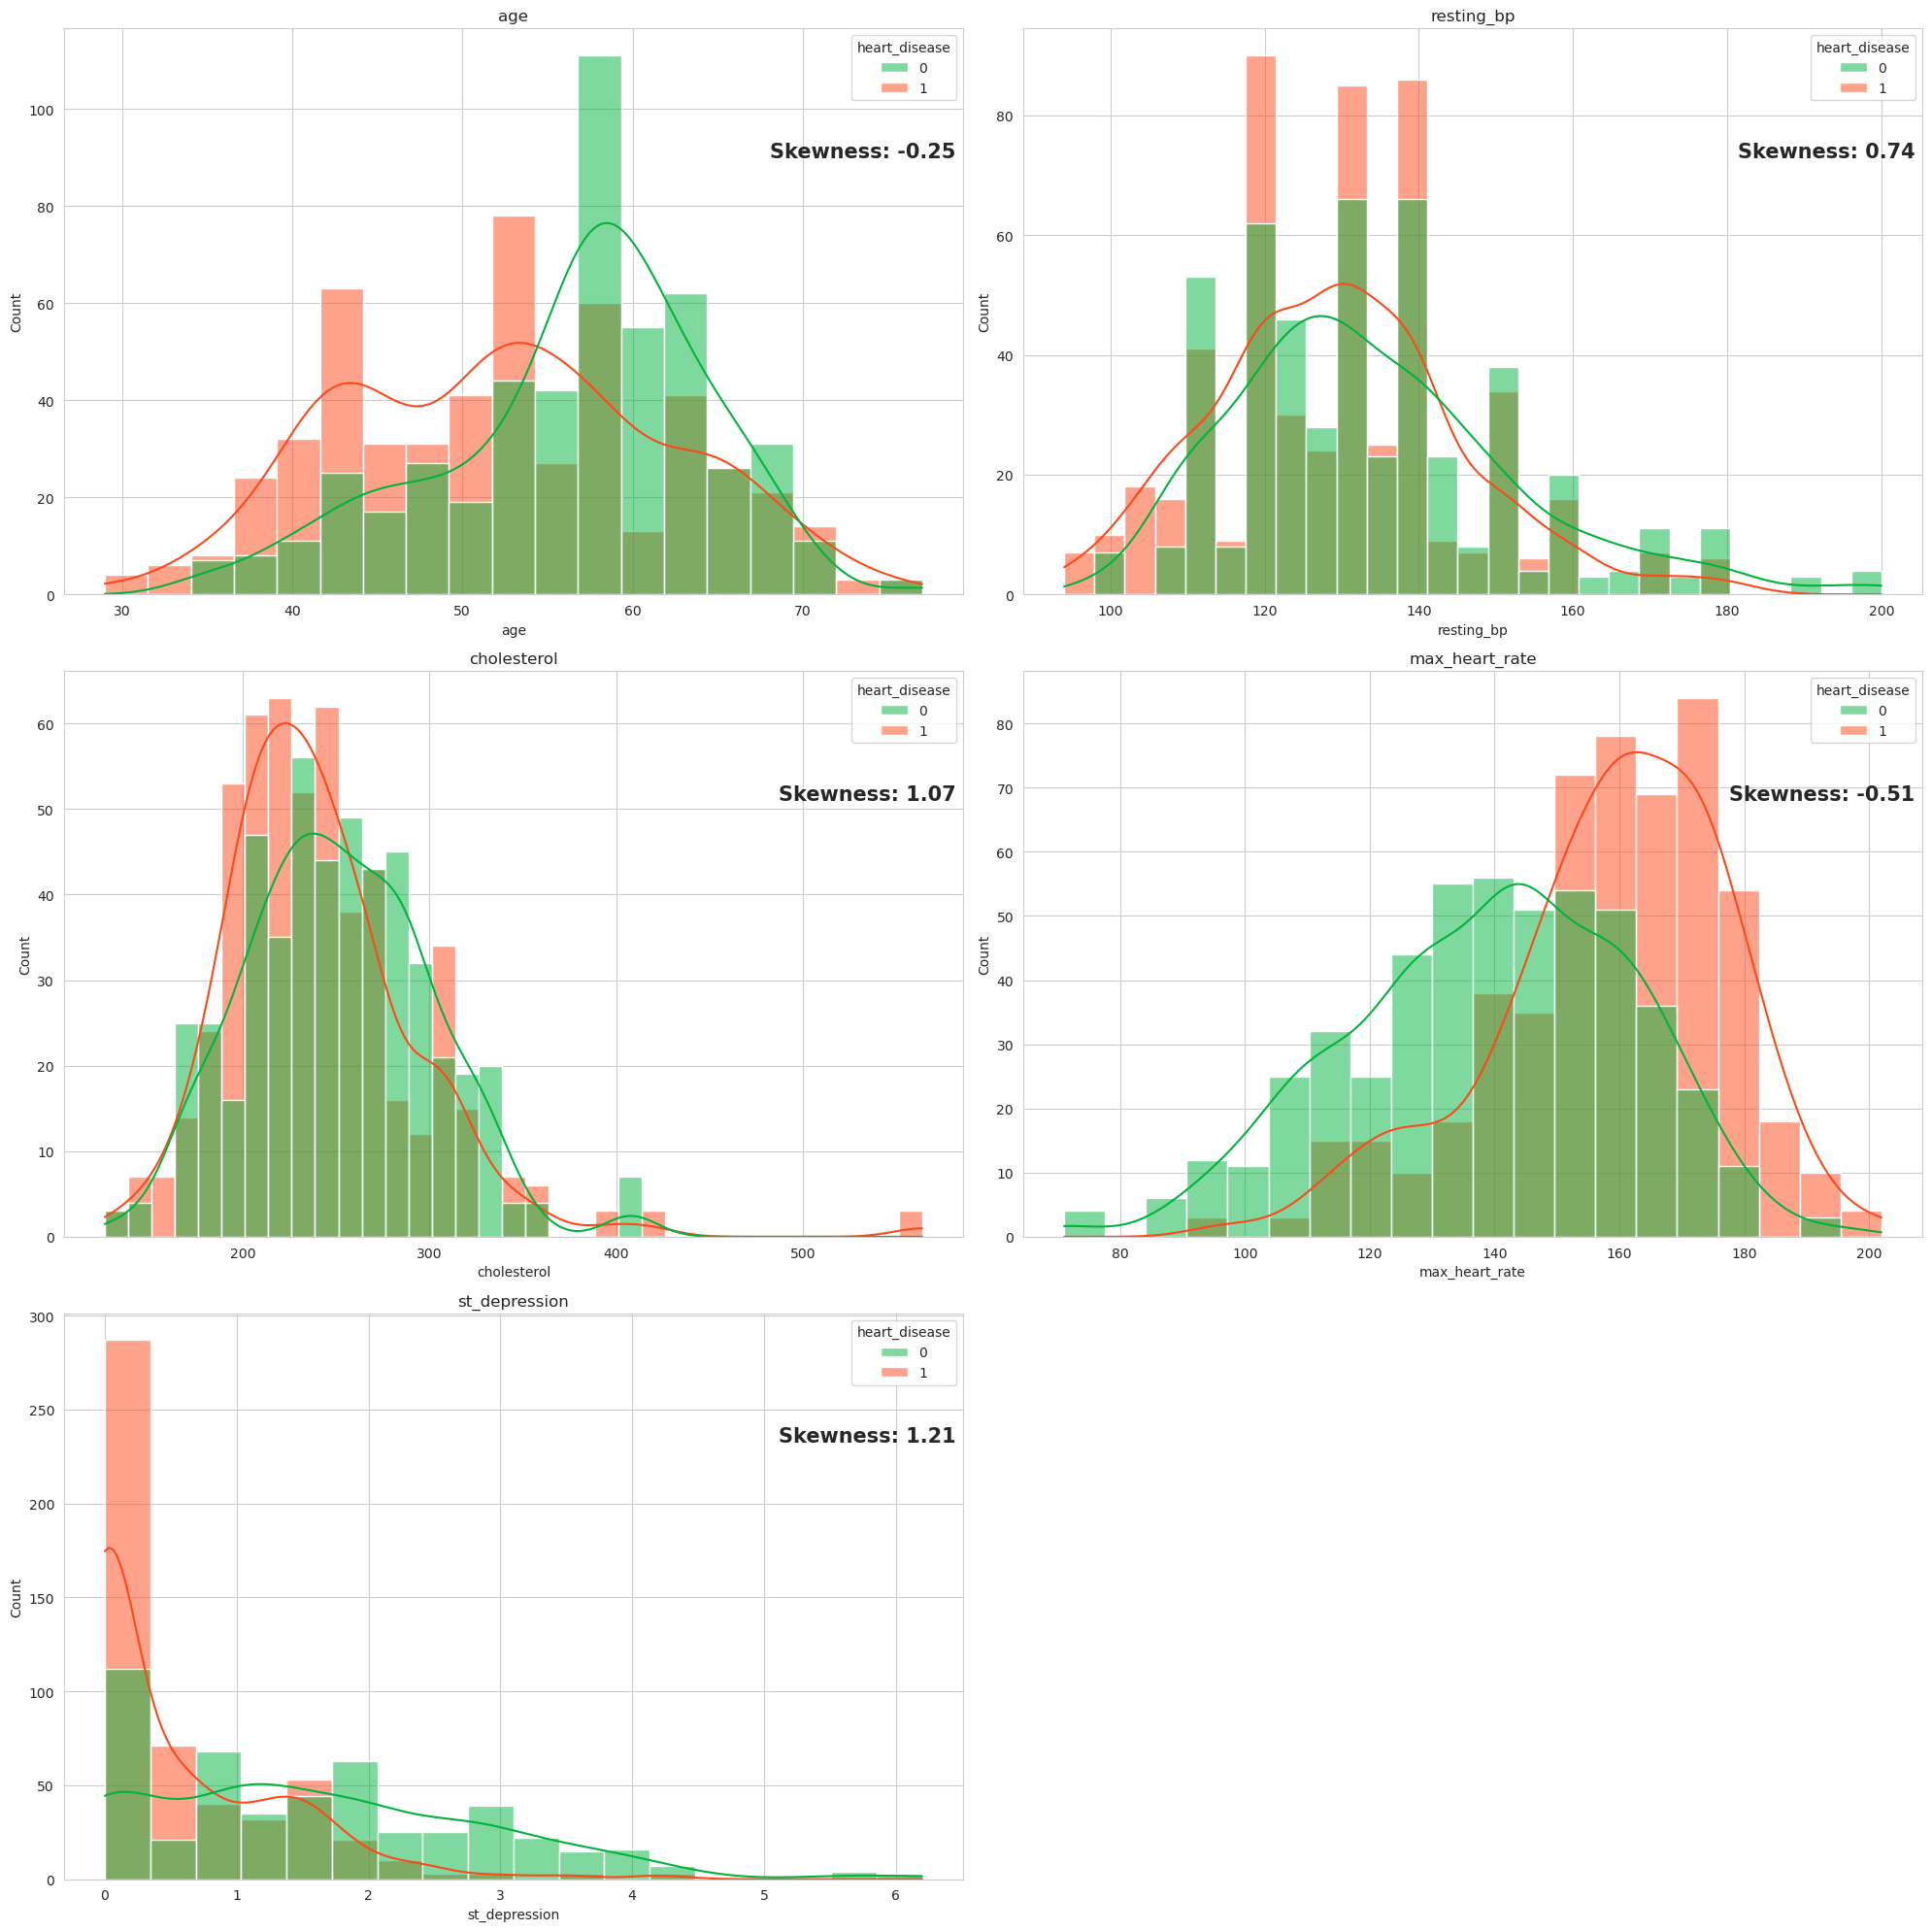

In [22]:
def histogram(data, features, hue=None, cols=1, palette=None):
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(features, 1):
        rows = (len(features) + 1) // 2
        plt.subplot(rows, cols, i)
        sns.histplot(data=df, x=col, hue=hue, kde=True, palette=colors)
        plt.title(col)
        
        # Calculate skewness
        skewness = df[col].skew()
        
        # Add skewness annotation
        plt.text(0.992, 0.8, f'Skewness: {skewness:.2f}', transform=plt.gca().transAxes,
                 fontsize=15, verticalalignment='top', horizontalalignment='right', weight='bold')
        
    plt.tight_layout()
    plt.show()
histogram(df, cont_var, hue='heart_disease', cols=2, palette=colors)

In [23]:
def nth_root_transformation(data, features, root=1/2):
    '''
    features should be an iterable with the columns to which the transformation should be done
    '''
    for col in features:
        original_skew = data[col].skew()
        data[col] = np.power(data[col], root)
        transformed_skew = df[col].skew()
        print('--> {} has an original skewness of {} and it has been transformed '
      'using the {} root and the new skewness is {}'.format(col, original_skew, root, transformed_skew))

        
nth_root_transformation(df, ['cholesterol'], root=1/50)
nth_root_transformation(df, ['st_depression'], root=1/2)

--> cholesterol has an original skewness of 1.0740727783354815 and it has been transformed using the 0.02 root and the new skewness is 0.09558844933431694
--> st_depression has an original skewness of 1.2108993882065326 and it has been transformed using the 0.5 root and the new skewness is 0.12688328247838557


In [24]:
def data_split(data, target, test_size=0.2, random_state=0):
    X = data.drop(target, axis=1)
    y = data[target]
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X, y, X_train, X_test, y_train, y_test

In [25]:
#define the model
classifiers = [SVC(), DecisionTreeClassifier(ccp_alpha=0), RandomForestClassifier()]
def base_model(classifiers, data, target):
    X, y, X_train, X_test, y_train, y_test = data_split(data,target)
    ss = StandardScaler()
    X_train[cont_var] = ss.fit_transform(X_train[cont_var])
    X_test[cont_var] = ss.transform(X_test[cont_var])
    #return X_train, X_test

    scores = []
    for model in classifiers:
        clf = model
        clf.fit(X_train, y_train)
        y_pred_test = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)
        
        train_acc = accuracy_score(y_train, y_pred_train)
        test_acc = accuracy_score(y_test, y_pred_test)
        cvs = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
        
        scores.append({
            'model':clf.__class__.__name__,
            'train_accuracy':train_acc,
            'test_accuracy':test_acc,
            'cross_val_score':cvs.mean()
        })
        
        print(str(clf.__class__.__name__).center(100, '*'))
        print('Classification Report:')
        print(classification_report(y_test, y_pred_test))
        print('Confusion Matrix:')
        print(confusion_matrix(y_test, y_pred_test))
        roc_display = RocCurveDisplay.from_estimator(clf, X_test, y_test)
        #roc_display.plot()
        plt.title('ROC Curve - ' + clf.__class__.__name__)
        plt.show()
          
    return pd.DataFrame(scores, columns=scores[0].keys())

************************************************SVC*************************************************
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        98
           1       0.90      0.95      0.93       107

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205

Confusion Matrix:
[[ 87  11]
 [  5 102]]


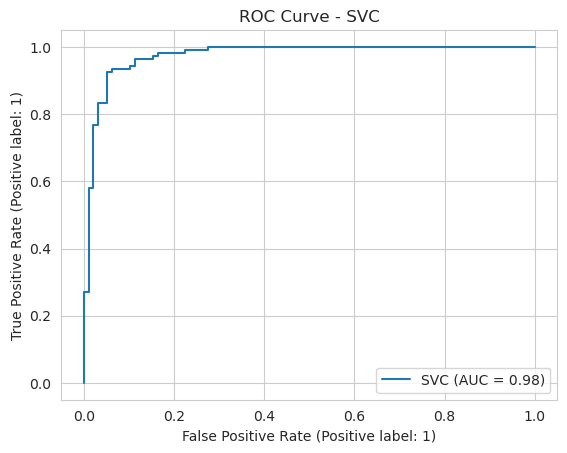

***************************************DecisionTreeClassifier***************************************
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Confusion Matrix:
[[ 98   0]
 [  0 107]]


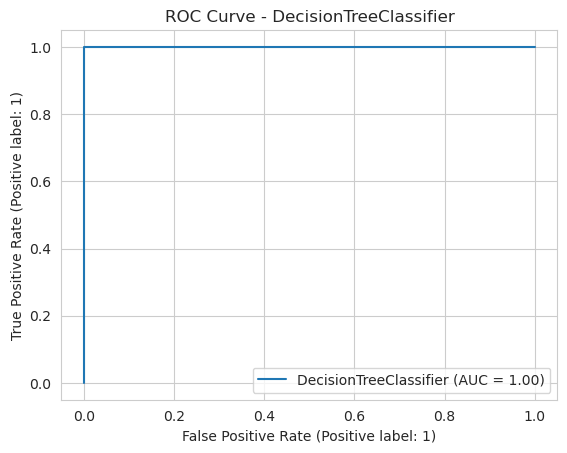

***************************************RandomForestClassifier***************************************
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Confusion Matrix:
[[ 98   0]
 [  0 107]]


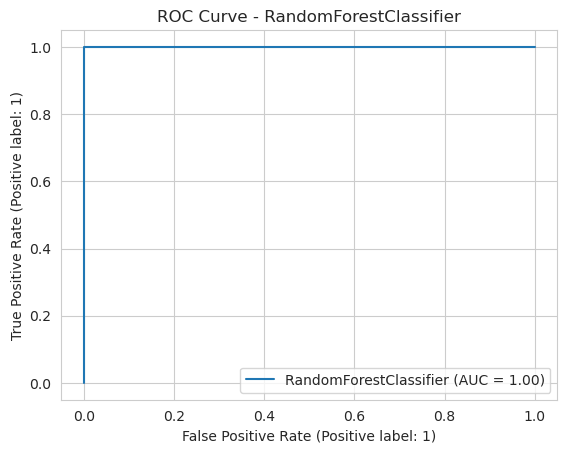

,model,train_accuracy,test_accuracy,cross_val_score
0,SVC,0.910976,0.921951,0.709109
1,DecisionTreeClassifier,1.000000,1.000000,1.000000
2,RandomForestClassifier,1.000000,1.000000,0.997059


In [26]:
base_model(classifiers=classifiers,data=df,target='heart_disease')

Since the models performed well with the maximum accuracy (AUC = 1, No FP, FN) by the default parameters not hypertuning is performed, if at all the default parameters didn't produce the best results then hyper tuning is required (GridSearchCV).

- This maximum accuracy explains that the model has been successful in predicting the outcome of the heart disease (with the maximum accuracy) when the required parametrs are given to it.

In [27]:
#save the model - pickle file .pkl
from pickle import dump

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

dump(clf, open('heartDisease.pkl', 'wb'))